## Recognising Handwritten Digits on MNIST Dataset using KNN

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1 : Data Preparation 

In [4]:
df = pd.read_csv('mnist_test.csv');
print(df.shape)

(10000, 785)


In [5]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


So these are black and white images, and each image is store in a row of this matrix,
each image is store in the row size of 784 which we will convert it into a 2d matrix of  28x28.

In [6]:
df.head(n=5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = df.values
print(data.shape) # we convert the given data into numpy array
print(type(data))

(10000, 785)
<class 'numpy.ndarray'>


In [8]:
X = data[:,1:]
Y = data[:,0]
print(X.shape)
print(Y.shape)

(10000, 784)
(10000,)


In [9]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

8000
(8000, 784) (8000,)
(2000, 784) (2000,)


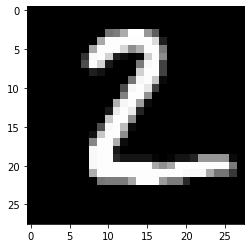

2


In [11]:
# visualise some samples

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

drawImg(X_train[1])
print(Y_train[1])

### Step 2 : Apply KNN
(can we apply KNN)

In [12]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
    
    vals = sorted(vals)
    # Nereast/ First K points
    vals = vals[:k]
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts = True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    

### Step 3 : Make Prediction

4


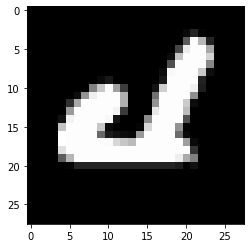

4
9


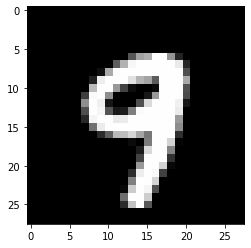

9
9


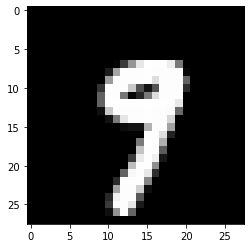

9
7


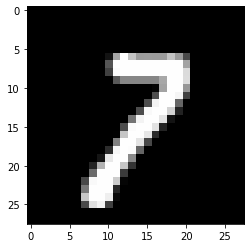

7
1


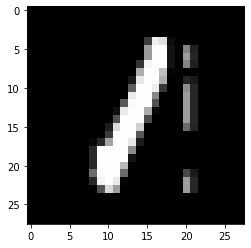

1


In [18]:
for i in range (5):
    pred = knn(X_train, Y_train, X_test[i])
    print(int(pred))
    drawImg(X_test[i])
    print(Y_test[i])
plt.show()

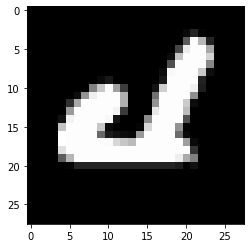

4
